# Сегментация покупателей интернет-магазина товаров для дома "Пока все ещё тут"

**Задача:** провести сегментацию покупателей (выявить несколько групп) на основе истории их покупок и сформировать рекомендации по дальнейшей работе с клиентами из разных групп. А также изучить динамику основных метрик бизнеса.

**Цель:** сформировать клиентоориентированных подход в работе интернет-магазина (с применением сегментации клиентов), который позволит увеличить выручку.

**Ожидаемый результат:** увеличение выручки магазина благодаря применению сегментации клиентов и рекомендаций по работе с ними. 

**Заказчик:** менеджер проекта интернет-магазина

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Категории-товаров" data-toc-modified-id="Категории-товаров-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Категории товаров</a></span></li><li><span><a href="#Наиболее-и-наименее-популярные-категории-товаров;" data-toc-modified-id="Наиболее-и-наименее-популярные-категории-товаров;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Наиболее и наименее популярные категории товаров;</a></span></li><li><span><a href="#Динамика-по-выручке" data-toc-modified-id="Динамика-по-выручке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Динамика по выручке</a></span></li><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Средний чек</a></span></li><li><span><a href="#Активность-пользователей" data-toc-modified-id="Активность-пользователей-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Активность пользователей</a></span></li><li><span><a href="#Средняя-выручка-с-покупателя" data-toc-modified-id="Средняя-выручка-с-покупателя-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Средняя выручка с покупателя</a></span></li><li><span><a href="#Повторные-покупки" data-toc-modified-id="Повторные-покупки-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Повторные покупки</a></span></li></ul></li><li><span><a href="#Сегментация" data-toc-modified-id="Сегментация-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Сегментация</a></span><ul class="toc-item"><li><span><a href="#Частота-заказов" data-toc-modified-id="Частота-заказов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Частота заказов</a></span></li><li><span><a href="#Сумма-заказа" data-toc-modified-id="Сумма-заказа-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сумма заказа</a></span></li><li><span><a href="#Давность-последнего-заказа" data-toc-modified-id="Давность-последнего-заказа-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Давность последнего заказа</a></span></li><li><span><a href="#Сезонность" data-toc-modified-id="Сезонность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сезонность</a></span></li><li><span><a href="#Структура-потребления" data-toc-modified-id="Структура-потребления-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Структура потребления</a></span></li></ul></li><li><span><a href="#Проверка-продуктовых-гипотез" data-toc-modified-id="Проверка-продуктовых-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка продуктовых гипотез</a></span><ul class="toc-item"><li><span><a href="#Различия-по-средней-выручке-с-покупателя-в-зависимости-от-давности-последнего-заказа" data-toc-modified-id="Различия-по-средней-выручке-с-покупателя-в-зависимости-от-давности-последнего-заказа-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Различия по средней выручке с покупателя в зависимости от давности последнего заказа</a></span></li><li><span><a href="#Различия-в-количестве-заказов-в-зависимости-от-давности-последнего-заказа" data-toc-modified-id="Различия-в-количестве-заказов-в-зависимости-от-давности-последнего-заказа-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Различия в количестве заказов в зависимости от давности последнего заказа</a></span></li><li><span><a href="#Различия-по-сезонности" data-toc-modified-id="Различия-по-сезонности-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Различия по сезонности</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Выполнение проекта
## Предобработка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import numpy as np
from scipy import stats as st

In [2]:
df_addon = pd.read_csv('/datasets/ecom_dataset_upd.csv')

In [3]:
df_addon.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
df_addon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


Названия колонок корректны. Пропусков в датасете нет. Столбец с датой необходимо привести к корректному формату. в существующем столбце date оставим только дату, а в столбец dt запишем дату и время.

In [5]:
df_addon['dt'] = pd.to_datetime(df_addon['date'], format = '%Y%m%d%H')
df_addon['date'] = df_addon['dt'].dt.date
df_addon.head()

,date,customer_id,order_id,product,quantity,price,dt
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01


In [6]:
print('В датасете представленныее данные за период с', df_addon['dt'].min(), 'по', df_addon['dt'].max())

В датасете представленныее данные за период с 2018-10-01 00:00:00 по 2020-01-31 15:00:00


Сезонность спроса на те или иные товары можно проверить лишь по нескольким месяцам. Доступно сравнение:
- январь 2019 и 2020;
- октябрь, ноябрь, декабрь 2018 и 2019.

Выделим в отдельные колонки данные с днем, месяцем и годом покупки.

In [7]:
df_addon['month'] = pd.DatetimeIndex(df_addon['date']).month
df_addon['year'] = pd.DatetimeIndex(df_addon['date']).year

In [8]:
df_addon.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,7474.0,49449.884265,32679.642404,12624.0,14833.0,68768.0,71257.75,112789.0
quantity,7474.0,2.362858,14.500497,1.0,1.0,1.0,1.00,1000.0
price,7474.0,478.737501,901.615895,9.0,97.0,135.0,439.00,14917.0
month,7474.0,6.540139,3.315242,1.0,4.0,6.0,10.00,12.0
year,7474.0,2018.845732,0.449977,2018.0,2019.0,2019.0,2019.00,2020.0


В столбце с кол-вом товара в заказе можно увидеть аномально большое значение - возможно это тестовый заказ, который забыли удалить из датасета. Посмотрим как распределены значения в этом столбце.

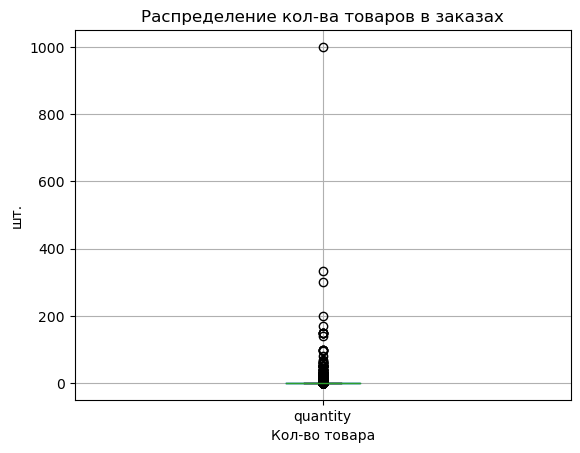

In [9]:
df_addon.boxplot(column=['quantity'])
plt.title('Распределение кол-ва товаров в заказах')
plt.xlabel('Кол-во товара')
plt.ylabel('шт.');

In [10]:
df_addon.query('quantity > 900')

,date,customer_id,order_id,product,quantity,price,dt,month,year
5456,2019-06-18,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,2019-06-18 15:00:00,6,2019


Тысяча вантузов в одном заказе - не похоже на реальную покупку. Тестовый заказ найден - удаляем его.

In [11]:
df_addon = df_addon.query('quantity < 900')

Приведем названия товаров к нижнему регистру и попробуем поискать дубликаты. Также сделаем замены для поиска неявных дублей - поменяем параметры с размером: "d-X см" на "dX см" и аналогично по Д и h; заменим ё на е.

In [12]:
df_addon['product'] = df_addon['product'].str.lower()

In [13]:
df_addon['product'] = (df_addon['product'].str.replace('d-', 'd')
                       .str.replace('h-', 'h')
                       .str.replace('д-', 'd')
                      .str.replace('наматрицник', 'наматрасник').
                       str.replace('наматрацник', 'наматрасник').
                      str.replace('ё', 'е'))

In [14]:
df_addon.duplicated().sum()

0

Полные дубликаты отсутствуют. 

Проверим, что одному заказу соответствует один покупатель и одна дата (с учетом временем). Известно, что:
- номер заказа формируется в момент оплаты, в этот же момент формируется запись в датасет;
- номер пользователя присваивается в момент регистрации, необходимой для финального оформления заказа и оплаты;
- некоторые виды взаимодействия с пользователем после оформления заказа записываются некорректно. Из-за этого в датасете задублировалась часть заказов при выгрузке. 

Таким образом, если для 1 заказа указано несколько дат, то следует оставить **первую дату вхождения** (самую раннюю) при условии, что номер заказа и товар остается один и тот же.
Если для 1 заказа указано несколько клиентов, то будем оставлять также **первый идентификатор**, при условии, что номер заказа и товар остается один и тот же. Таким образом оставим именно того клиента, который оформил и оплатил заказ.

In [15]:
print('Всего строк-дублей в датасете:', df_addon.duplicated(subset=['dt', 'customer_id', 'order_id']).sum())

Всего строк-дублей в датасете: 3318


In [16]:
print('В датасете обнаружено', 
      len(df_addon.groupby(by=['order_id'])
          .agg({'dt':'nunique', 'customer_id':'nunique'})
          .query('dt > 1 or customer_id > 1')
          .sort_values(by='dt', ascending=False)),
      'заказов, для которых указано более одной даты и/или покупателя.')

В датасете обнаружено 285 заказов, для которых указано более одной даты и/или покупателя.


In [17]:
df_addon.groupby(by=['order_id']).agg(
                                    {'dt':'nunique', 'customer_id':'nunique'}
                                    ).query('dt > 1 or customer_id > 1').sort_values(by='dt', ascending=False).head()

,dt,customer_id
order_id,,
14833,74,1
70960,60,1
69162,23,1
71148,16,1
69531,12,2


Для начала отсортируем датасет по дате, что первой строке заказа соответствовала самая первая дата.

In [18]:
df_addon = df_addon.sort_values(by='dt')
df_addon = df_addon.drop_duplicates(subset=['order_id', 'product'], keep='first')

Проверим остались ли еще в датасете заказы с более чем одной датой и/или покупателем. Если такие найдутся - значит это заказы, в которых отличается товар. Для них также оставим только записи с первой датой вхождения (товары могут отличаться).

In [19]:
errors = df_addon.groupby('order_id', 
                          as_index=False).agg(first_dt=('dt', 'first'),
                                              dt=('dt','nunique'), 
                                              customer=('customer_id', 'nunique')
                                             ).query('dt > 1 or customer > 1').reset_index(drop=True)
errors

,order_id,first_dt,dt,customer
0,14500,2018-10-28 08:00:00,2,1
1,14649,2019-04-16 13:00:00,2,1
2,14898,2019-07-09 22:00:00,2,1
3,69485,2018-12-20 16:00:00,2,2
4,69527,2018-12-23 12:00:00,2,1
5,69750,2019-01-09 14:00:00,2,1
6,69807,2019-01-13 22:00:00,2,1
7,70186,2019-02-10 10:00:00,2,1
8,70318,2019-02-18 11:00:00,2,1
9,70995,2019-04-03 17:00:00,2,1


In [20]:
index_to_drop = []
i=0
for order in errors['order_id']:
    first_dt = errors.loc[i, 'first_dt']
    index_to_drop.append(df_addon.query('order_id == @order and dt != @first_dt').index.tolist())
    i=i+1

In [21]:
for i in index_to_drop:
    df_addon = df_addon.drop(index=i)

И снова проверим остались ли ошибки:

In [22]:
if len(df_addon
       .groupby('order_id', as_index=False)
       .agg(first_dt=('dt', 'first'),
            dt=('dt','nunique'), 
            customer=('customer_id', 'nunique'))
       .query('dt > 1 or customer > 1')) == 0:
    print('Ошибок нет!')

Ошибок нет!


## Исследовательский анализ данных

Предобработка датасета проведена, приступаем к анализу данных.

### Категории товаров
Для более полной картины при проведении анализа сначла разделим товары по категориям.

In [23]:
def product_category(row):
    '''
    Выделяем категории товаров: растения, ремонт, кухня, уборка, ванная, текстиль, декор и прочее
    '''
    
    plants = ['пеларгония', 'калибрахоа', 'бакопа', 'герань', 'петуния', 'дерево', 'помидор', 'роза', 
          'гвоздика', 'растение', 'рассада', 'юкка', 'эхеверия', 'суккулент', 'эвкалипт', 'мирт', 'фиалка', 'хризантема', 
              'гербера', 'мелисса', 'спатифиллум', 'циперус', 'примула', 'кактус', 'тюльпан', 'папоротник', 'дыня',
             'мята', 'базилик', 'хоста', 'вербе', 'дендро', 'камнеломка', 'овсянница', 'бегония', 'лаванда',
              'декабрист', 'фуксия', 'лобелия', 'тимьян','пуансеттия', 'арбуз', 'огурец', 'антуриум', 'флокс', 'колокольчик',
              'цикламен', 'эпипремнум','ранункулус', 'хлорофитум', 'афеляндра скуарроса', 'кашпо']
    kitchen = ['нож', 'салфет', 'столовы', 'кухон', 'скатерть', 'салатник', 'чайник', 'варка', 'посуд', 'вилка', 'чайный', 
               'бокал', 'фужер', 'блюдо', 'стакан', 'ложка', 'разделочн', 'противень', 'половник', 
               'блюдц', 'тарелк', 'кружка', 'выпечк', 'сковород', 'кружек', 'кувшин', 'миксер', 'хлебница', 'терка', 'штопор',
              'сахарница', 'термос', 'соковыжим', 'миска', 'кастрюл', 'сотейник']
    remont = ['крепеж', 'пружина', 'полк', 'стяжка', 'шпингалет', 'скоба', 'петля', 'карниз', 'уголок', 'инструмент', 
              'лестница', 'стремянк', 'сверло', 'сверел', 'завертка', 'мебел', 'фиксатор', 'комод', 'штор']
    storage = ['вешал', 'плечики', 'короб', 'крючок', 'кофр', 'хранен', 'корзин', 'чехол', 'контейнер', 'тележка',
               'банка', 'емкость', 'для обув']
    clean = ['щетка', 'швабр', 'перчатки', 'тряпк', 'веник', 'пылесос', 'урна', 'мусор', 'моп', 'сметка', 'ерш', 
             'чистк', 'ведр', 'совок']
    bath = ['ванн', 'унитаз', 'туалет', 'ковш', 'сушилк', 'таз', 'прищеп', 'вантуз' , 'гладильн', 'мыл']
    tkan = ['наматрасник', 'простын', 'одеял', 'полотен', 'покрывало', 'постель', 'халат', 'плед', 'хлопков', 'подушк',
           'ковер', 'коврик', 'ткань']
    dekor = ['муляж', 'искусствен', 'декоратив']
    
    if any(word in row['product'] for word in kitchen):
        return 'кухня'
    if any(word in row['product'] for word in clean):
        return 'все для уборки'
    if any(word in row['product'] for word in tkan):
        return 'текстиль'
    if any(word in row['product'] for word in storage):
        return 'хранение'
    if any(word in row['product'] for word in dekor):
        return 'декор'
    if any(word in row['product'] for word in plants):
        return 'растения'
    if any(word in row['product'] for word in remont):
        return 'ремонт'
    if any(word in row['product'] for word in bath):
        return 'ванная'
    else:
        return 'прочее'

In [24]:
df_addon['category'] = df_addon.apply(product_category, axis=1)

Посмотрим как распределились товары по категориям:

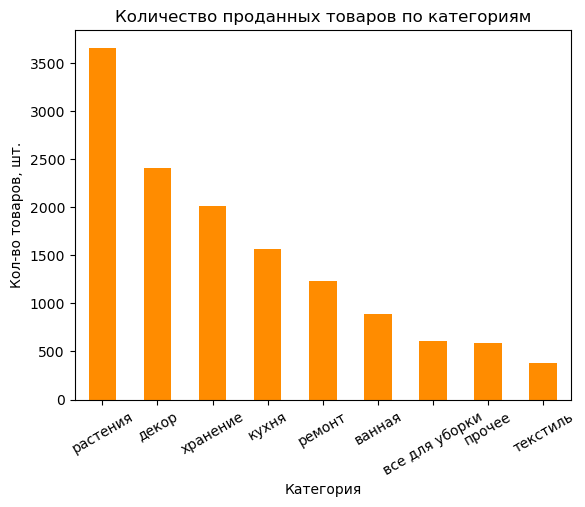

In [25]:
(df_addon.groupby('category')
 .agg(products=('quantity', 'sum'))
 .sort_values(by='products', ascending=False)
 .plot(kind='bar', color='darkorange', legend=False))
plt.title('Количество проданных товаров по категориям')
plt.xlabel('Категория')
plt.xticks(rotation=30)
plt.ylabel('Кол-во товаров, шт.')
plt.show();

Больше всего по количеству было продано товаров из категории растения и декор. Меньше всего - текстиль.

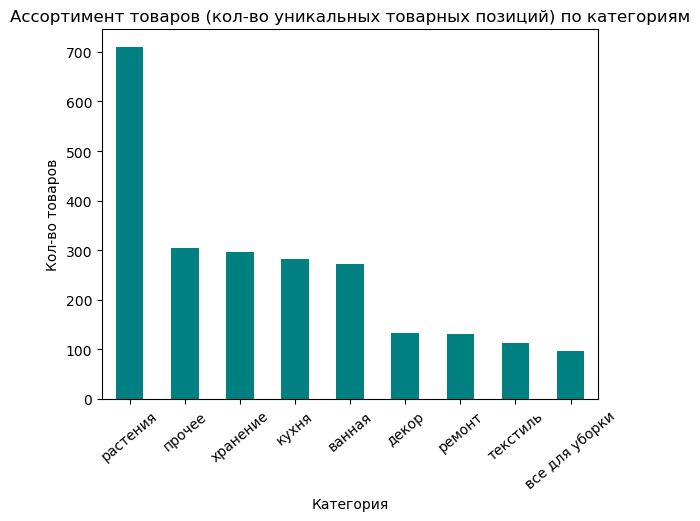

In [26]:
df_addon.groupby('category').agg({'product': 'nunique'}
                                ).sort_values(by='product', ascending=False).plot(kind='bar', 
                                                                                  legend=False, color='teal')
plt.title('Ассортимент товаров (кол-во уникальных товарных позиций) по категориям')
plt.xlabel('Категория')
plt.xticks(rotation=40)
plt.ylabel('Кол-во товаров')
plt.show();

В интернет-магазине больше всего товаров категории растения - около 700 шт. На втором месте по количеству товаров со значительным отрывом (примерно 300 шт.) - категория прочее, но стоит учесть, что при распределении могли закрасться небольшие неточности из-за большого количества ращличных наименований для растений. Далее примерно с одинаковым количеством товаров идут категории хранение, кухня и ванная (у каждой чуть менее 300 товаров).

### Наиболее и наименее популярные категории товаров;

Посмотрим какие категории и товары чаще всего встречаются в заказах за все время. В одном заказе могут встречаться товары из разных категорий.

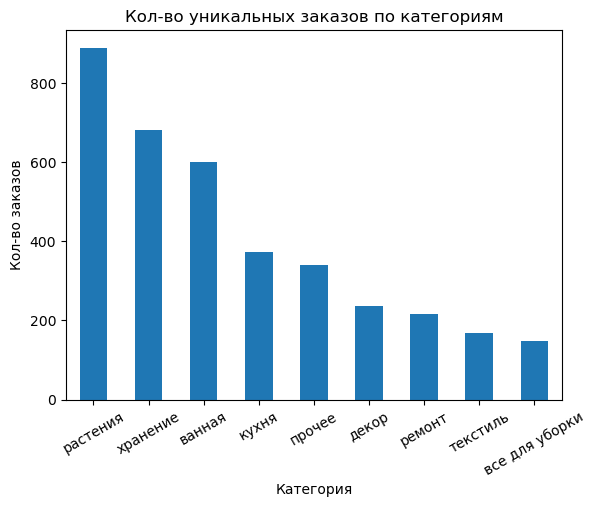

In [27]:
(df_addon.pivot_table(index='category', values='order_id', aggfunc='nunique')
 .sort_values(by='order_id', ascending=False)
 .plot(kind='bar', legend=False))
plt.title('Кол-во уникальных заказов по категориям')
plt.xlabel('Категория')
plt.xticks(rotation=30)
plt.ylabel('Кол-во заказов')
plt.show();

Чаще всего в заказы попадали товары из категорий растения, хранение и ванная. Реже всего - текстиль и товары для уборки.

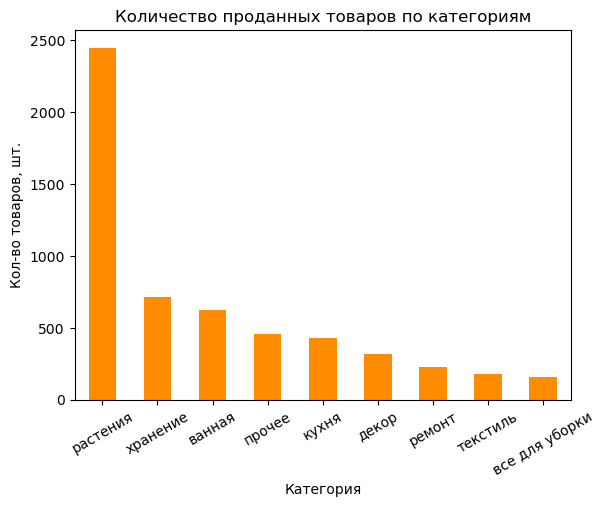

In [28]:
(df_addon.groupby('category')
 .agg(products=('category', 'count'))
 .sort_values(by='products', ascending=False)
 .plot(kind='bar', color='darkorange', legend=False))
plt.title('Количество проданных товаров по категориям')
plt.xlabel('Категория')
plt.xticks(rotation=30)
plt.ylabel('Кол-во товаров, шт.')
plt.show();

Абсолютный лидер по количеству проданных товаров - категория растения (почти 2,5 тыс. товаров). Далее идут категории хранение и ванная - примерно 600-700 проданных товаров на кажду. Топ-3 по количеству проданных товаров соответствует топ-3 по количеству заказов по категроиям. Меньше всего (как и по кол-ву заказов) было продано товаров категорий текстиль и все для уборки.

### Динамика по выручке

Чтобы изучить как менялась выручка интернет-магазина для начала посчитаем стоимость товаров в каждом заказе с учетом количества товара, далее сгруппировав датасет по заказам найдем стоимость каждого заказа. Построим график кумулятивной выручки за все время (суммарная выручка должна постоянно расти), а также сравним выручку за одинаковые периоды в разные года:
- октябрь, ноябрь, декабрь 2018 и 2019 годов;
- январь 2019 и 2020 годов.

In [29]:
df_addon['total_price'] = df_addon['quantity']*df_addon['price']
df_addon['total_price'] = df_addon['total_price'].astype('int64')

In [30]:
df_orders = df_addon.groupby(['order_id', 'date', 'customer_id'], 
                             as_index=False).agg(order_price=('total_price', 'sum'),
                                                 main_category=('category', 'first'),
                                                category_count=('category', 'nunique')
                                                ).sort_values(by='date').reset_index(drop=True)

In [31]:
df_orders['year_month'] = df_orders['date'].astype('datetime64[ns]').dt.to_period("M")

В некоторых заказах встречаются товары из разных категорий. Посмотрим сколько таких заказов в датасете и дальше для них будем менять значение в столбце `main_category` (которое заполняется первым из значений в датасете) на наиболее часто встречающееся.

In [32]:
print('Количество заказов с более, чем 1 категорией товаров:', len(df_orders.query('category_count >1')))

Количество заказов с более, чем 1 категорией товаров: 96


In [33]:
for order in df_orders.query('category_count >1')['order_id']:
    df_orders.loc[df_orders['order_id'] == order, 'main_category'] = df_addon.loc[
                                                        df_addon['order_id'] == order, 'category'].mode()[0]

После замены столбец с количеством категорий можно удалить.

In [34]:
df_orders = df_orders.drop(columns='category_count', axis=1)
df_orders.head(3)

,order_id,date,customer_id,order_price,main_category,year_month
0,68486,2018-10-01,0948b0c2-990b-4a11-b835-69ac4714b21d,3648,хранение,2018-10
1,68487,2018-10-01,a576fa59-7b28-4a4c-a496-92f128754a94,188,хранение,2018-10
2,68485,2018-10-01,4d93d3f6-8b24-403b-a74b-f5173e40d7db,187,хранение,2018-10


In [35]:
revenue = df_orders.groupby('date', as_index=False).agg(rev_per_day=('order_price', 'sum'))

In [36]:
revenue['rev_cum'] = revenue['rev_per_day'].cumsum(axis=0)

In [37]:
revenue.head()

,date,rev_per_day,rev_cum
0,2018-10-01,13934,13934
1,2018-10-02,16746,30680
2,2018-10-03,7275,37955
3,2018-10-04,25170,63125
4,2018-10-05,4720,67845


Построим график кумулятивной выручки за все время, он должен все время расти - с точки зрения анализа метрик интернет-магазина он не несет особой ценности, но зато позволит увидеть общую картину и проверить нет ли ошибок в датасете. Далее будем строить график с помесячной выручкой для более детального исследования.

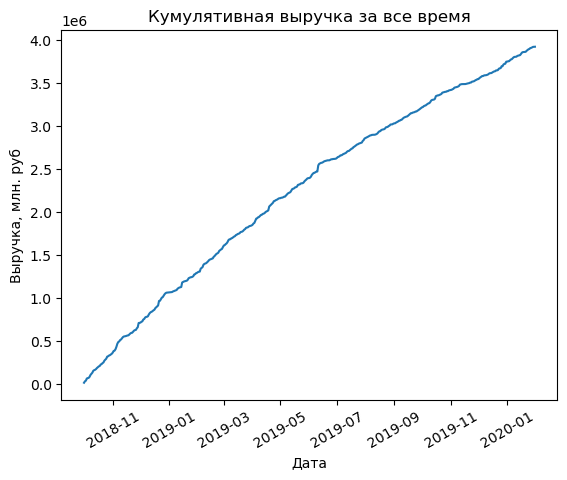

In [38]:
revenue.plot(kind='line', x='date', y='rev_cum', legend=False)
plt.title('Кумулятивная выручка за все время')
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.ylabel('Выручка, млн. руб')
plt.show();

Как и ожидалось кумулятивная выручука за все время растет, значит ошибок в датасете нет. Резких и сильно выделяющихся скачков на графике нет, однако можно заменить несколько небольших "бугорков", которые указывают на совершение крупных покупок.

Посмотрим на выручку за весь период.

In [39]:
revenue['month'] = pd.DatetimeIndex(revenue['date']).month
revenue['year'] = pd.DatetimeIndex(revenue['date']).year

In [40]:
df_addon['year_month'] = df_addon['dt'].dt.to_period("M")

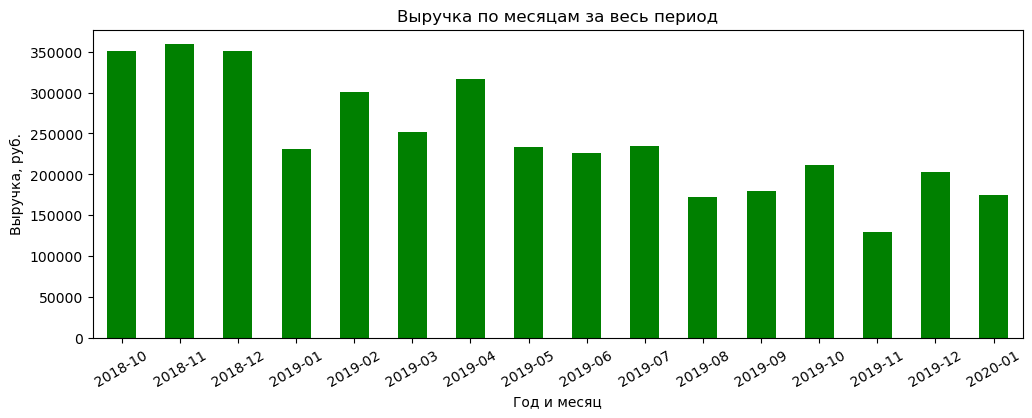

In [41]:
df_addon.groupby('year_month').agg({'total_price': 'sum'}).plot(kind='bar', legend=False, figsize=(12,4), color='green')
plt.title('Выручка по месяцам за весь период')
plt.xlabel('Год и месяц')
plt.xticks(rotation=30)
plt.ylabel('Выручка, руб.')
plt.show();

Выручка за последние 3 месяца 2018 года была значительно выше, чем в какой либо из других месяцев вплоть до января 2020 года. Т.е. месячная выручка снижается. В целом каких-то зависимостей, связанных с сезонностью пока не наблюдается.

Сопоставим выручку за одни и те же месяцы в разные года на одном графике для наглядности:

In [42]:
month_comparison = [1, 10, 11, 12]

In [43]:
revenue_monthly = revenue.groupby(['year', 'month'], as_index=False).agg(rev_per_month=('rev_per_day', 'sum'))

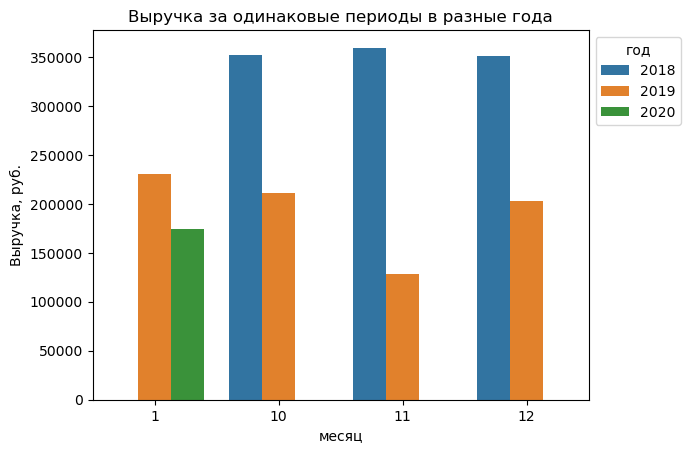

In [44]:
sns.barplot(data=revenue_monthly.query('month in @month_comparison'),
             x='month', y='rev_per_month', hue='year')
plt.title('Выручка за одинаковые периоды в разные года')
plt.legend(title='год', bbox_to_anchor=(1,1))
plt.xlabel('месяц')
plt.ylabel('Выручка, руб.')
plt.show();

Выручка за каждый из последних трех месяцев в 2019 году была гораздно меньше, чем за аналогичный период в 2018 году. А выручка за первый месяц 2020 года меньше, чем в январе 2019 года. Это говорит в целом об ухудшении состояния бизнеса.

Посмотрим динамику месячной выручки в разбивке по категориям товаров.

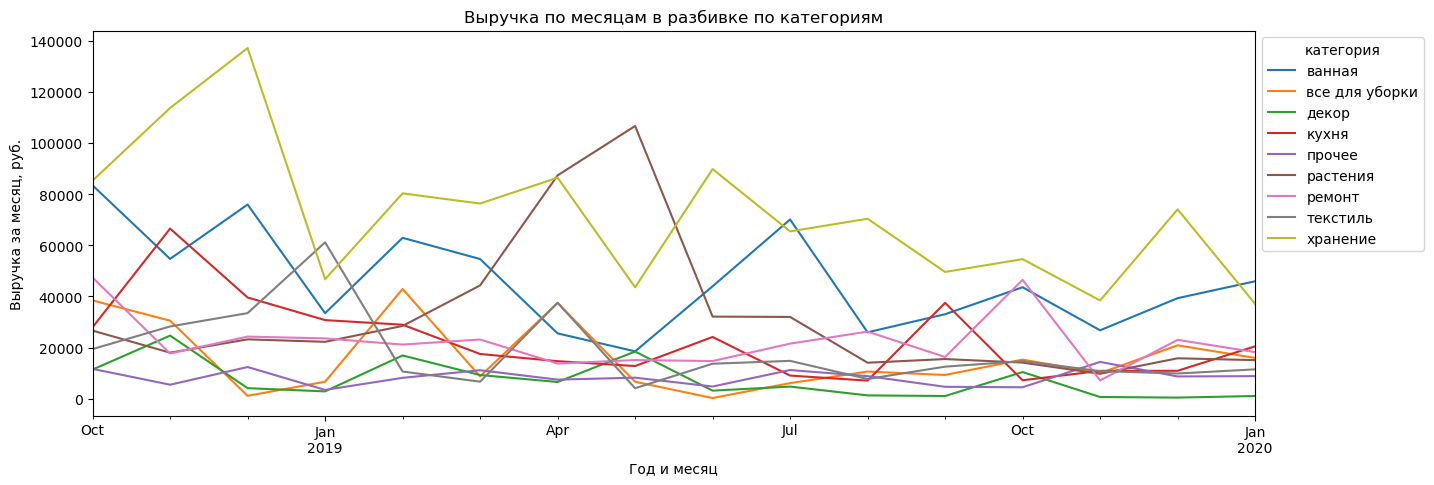

In [45]:
df_addon.pivot_table(index='year_month', columns='category', values='total_price', aggfunc='sum').plot(figsize=(15,5))
plt.legend(title='категория', bbox_to_anchor=(1,1), loc='upper left')
plt.title('Выручка по месяцам в разбивке по категориям')
plt.xlabel('Год и месяц')
plt.ylabel('Выручка за месяц, руб.')
plt.show();

Основную прибыль интернет-магазин получает от продажи товаров категории хранение. Также ощутимый вклад вносят категории ванная и растения. При чем в продажах растений наблюдается большой скачок выручки в весенние месяцы с пиком в мае. Это можно связать с сезонностью спроса на рассаду и различные цветы: в конце весны как правило активизируются дачные работы и посадки.

Посмотрим зависит ли выручка по категориям от цены и количества товаров в категории.

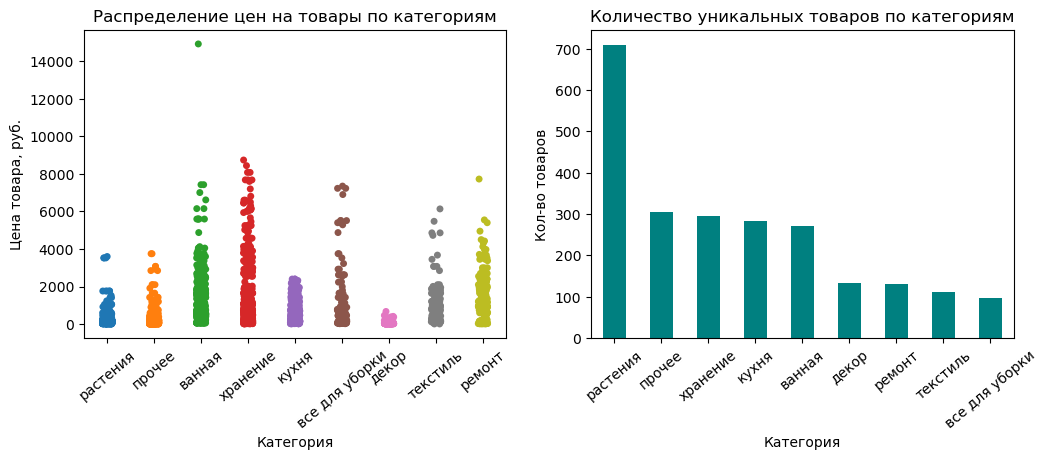

In [46]:
fig, ax = plt.subplots(1,2, figsize=(12, 4));

sns.stripplot(ax=ax[0], x='category', y='price', data=df_addon)
ax[0].set_title('Распределение цен на товары по категориям')
ax[0].set_xlabel('Категория')
ax[0].set_xticklabels(df_addon['category'].unique(), rotation=40)
ax[0].set_ylabel('Цена товара, руб.');

df_addon.groupby('category').agg({'product': 'nunique'}
                                ).sort_values(by='product', ascending=False).plot(ax=ax[1], kind='bar', 
                                                                                  legend=False, color='teal')
plt.title('Количество уникальных товаров по категориям')
plt.xlabel('Категория')
plt.xticks(rotation=40)
plt.ylabel('Кол-во товаров')
plt.show();

В интернет-магазине больше всего товаров в категории растения, но при этом цены на товары этой категории в основном находятся в диапазоне до 2000 руб.

Как помним, продажа товаров категорий хранение и ванная приносят больше всего выручки - видимо это связано с тем, что цены на товары из этих категорий самые большие и доходят до 9000 руб. (а самый дорогой товар в магазине в категории ванная с ценной более 14 тыс руб.)
Для повышения прибыли можно рассмотреть возможность расширения ассортимента категорий хранения и ванная.

### Средний чек
Рассмотрим как менялся средний чек заказов по месяцам за все время.

In [47]:
avg_sum = df_orders.groupby(['year_month'], as_index=False).agg(total_rev=('order_price', 'sum'), 
                                                                   orders=('order_id', 'count'))
avg_sum['avg_bill'] = round(avg_sum['total_rev']/avg_sum['orders'])

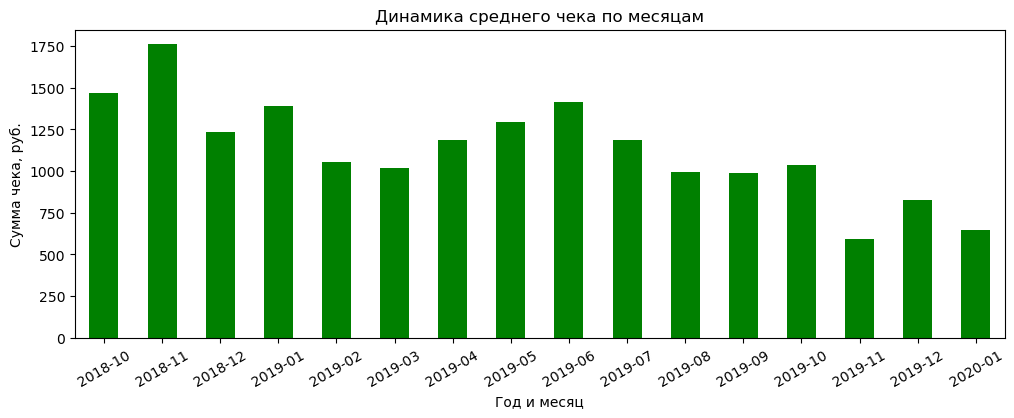

In [48]:
avg_sum.plot(kind='bar', x='year_month', y='avg_bill', color='green', legend=False, figsize=(12,4))
plt.title('Динамика среднего чека по месяцам')
plt.ylabel('Сумма чека, руб.')
plt.xlabel('Год и месяц')
plt.xticks(rotation=30)
plt.show();

Самое большое значение среднего чека (~1750 руб) было в ноябре 2018 года, самое маленькое (немного больше 500 руб) в октябре 2019 года. В последние три месяца 2019 года средний чек был значительно меньше, чем за последние тримесяца в 2018 году - показатели интернет-магазина ухудшаются. Показатели за январь 2020 также гораздо хуже, чем в пердыдущем году (менее 750 и 1750 руб соответственно).

По значению среднего чека можно определить месяца, в которые были оформлены очень крупные по сумме заказы. Это октябрь-ноябрь 2018, а также январь и июнь 2019 г.

За период окт-дек сезонность не наблюдается. За полный 2019 год наблюдается два пика - январь и июнь.

### Активность пользователей
Рассмотрим сколько уникальных пользователей совершают покупку за определенный период времени - месяц и день.

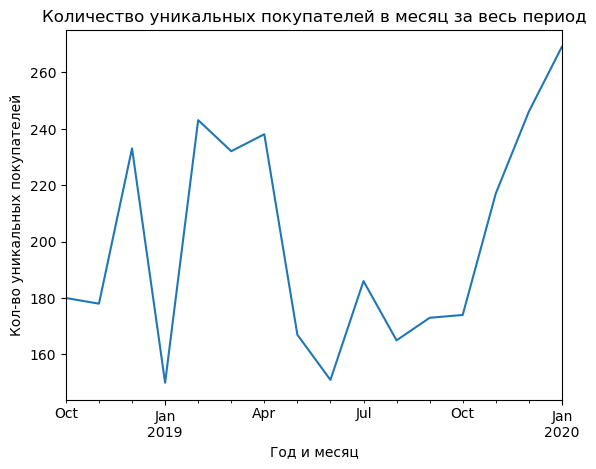

In [49]:
df_orders.groupby('year_month').agg({'customer_id': 'nunique'}).plot(legend=False)
plt.title('Количество уникальных покупателей в месяц за весь период')
plt.xlabel('Год и месяц')
plt.ylabel('Кол-во уникальных покупателей')
plt.show();

Помним, что в окт-дек 2018 года были самые высокие показатели по выручке, однако в эти месяцы было не так много уникальных покупателей - значит в конце 2018 года у магазина были ценные клиенты, которые совершали крупные покупки или делали более 1 заказа. В январе и июне 2019 года количество уникальных покупателей было минимально, хотя именно в эти месяцы был наибольший средний чек за весь 2019 год. В феврале и апреле был наплыв покупателей - скорее всего оказала влияние сезонность спроса на растения. 

Начиная с октября 2019 года количество уникальных клиентов в месяц начало резко расти и пришло к максимуму (более 260 уникальных клиентов в месяц) в январе 2020 (последнйи месяц из доступных данных). При это выручка и средний чек за этот месяц оставляет желать лучшего. Для увеличения прибыли необходимо удержать этих покупателей и сделать так, чтобы они оформляли заказы на бóльшие суммы.

In [50]:
print('Количество уникальных покупателей в среднем в месяц составляет', 
      round(df_orders.groupby('year_month').agg({'customer_id': 'nunique'})['customer_id'].mean()),
     'человек')

Количество уникальных покупателей в среднем в месяц составляет 200 человек


In [51]:
print('За день заказ в интернет-магазине совершает от', 
      df_orders.groupby('date').agg({'customer_id': 'nunique'})['customer_id'].min(), 'до',
      df_orders.groupby('date').agg({'customer_id': 'nunique'})['customer_id'].max(), 'уникальных клиентов.')

За день заказ в интернет-магазине совершает от 1 до 24 уникальных клиентов.


In [52]:
print('В среднем за все время (почти 1,5 года) в день оформляли заказ', 
      round(df_orders.groupby('date').agg({'customer_id': 'nunique'})['customer_id'].mean()),' уникальных клиентов.')

В среднем за все время (почти 1,5 года) в день оформляли заказ 7  уникальных клиентов.


### Средняя выручка с покупателя 
Рассмотрим среднюю выручку с покупателя за все время.

In [53]:
df = df_orders.groupby('customer_id', as_index=False).agg(revenue=('order_price', 'sum'),
                                     orders=('order_id', 'nunique'),
                                    first_order=('date', 'min'),
                                    last_order=('date', 'max'))

In [54]:
df['avg_rev_per_customer'] = df['revenue']/df['orders']

In [55]:
print('Среднее значение средней выручки с покупателя за все время:', round(df['avg_rev_per_customer'].mean()), 'руб.')
print('Медианное значение средней выручки с покупателя за все время:', round(df['avg_rev_per_customer'].median()), 'руб.')

Среднее значение средней выручки с покупателя за все время: 1166 руб.
Медианное значение средней выручки с покупателя за все время: 641 руб.


Среднее значение средней выручки с покупателя почти в 2 раза превышает медианное значение - это значит, что присутствует клиент с очень большой средней выручкой, которая искажает среднее значение.
Посмотрим как в целом распределены значения средней выручки с клиента

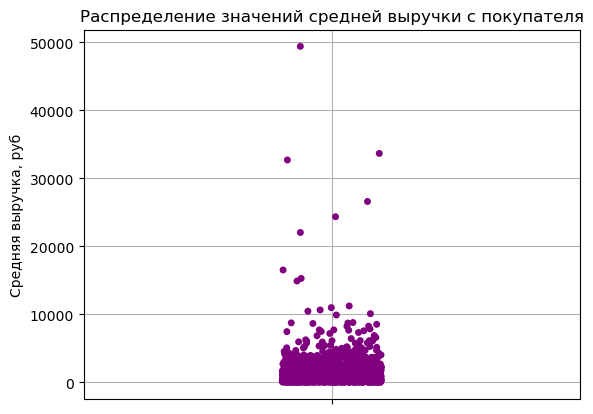

In [56]:
sns.stripplot(data=df, y='avg_rev_per_customer', color='purple')
plt.grid()
plt.ylabel('Средняя выручка, руб')
plt.title('Распределение значений средней выручки с покупателя')
plt.show();

Стали видны очень большие значения, которые как раз искажали среднее по средней выручке с клиента.
Посмотрим какое значение средней выручки с покупателя встречается чаще всего, для этого посроим гистограмму, ограничив для наглядности сумму средней выручки до 10 тыс руб.

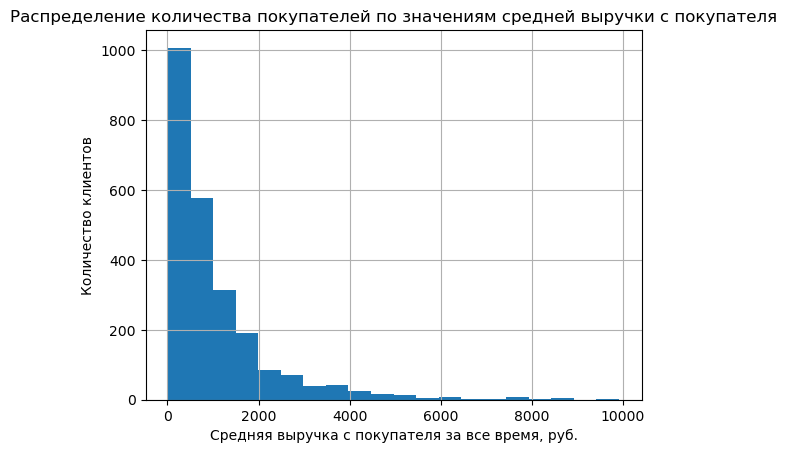

In [57]:
df.query('avg_rev_per_customer < 10000')['avg_rev_per_customer'].hist(bins=20); 
                                                                        #20 корзин на 10 тыс, т.е. 1 корзина ~500 руб
plt.title('Распределение количества покупателей по значениям средней выручки с покупателя')
plt.xlabel('Средняя выручка с покупателя за все время, руб.')
plt.ylabel('Количество клиентов')
plt.show();

В основном средняя вырчука с покупателя составляет до 2000 руб., большие суммы оставляют менее 200 чел.
- Чаще всего значение средней выручки с покупателя составляет до 500 руб - таких клиентов около 1000 чел.
- Порядка 600 покупателей принесли интернет-магазину в среднем от 500 до 1000 руб.
- В 2 раза меньшее число клиентов (~300 чел.) совершают заказы в среднем на сумму от 1000 до 1500 руб.
- Среднюю выручку в размере от 1500 до 2000 руб. с покупателя имеют около 200 клиентов.

Для сравнения средней выручки с покупателя за какой-либо период сначала нужно изучить как часто и сколько повторных покупок совершают клиенты.

<a id='frequency'></a>
### Повторные покупки
Исследуем покупателей с точки зрения частоты покупок - изучим сколько повторных заказов обычно совершают клиеты интернет-магазина. Для этого сгруппируем данные по id клиента и посчитаем количество заказов для каждого.

In [58]:
df.head()

,customer_id,revenue,orders,first_order,last_order,avg_rev_per_customer
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555,1,2019-10-16,2019-10-16,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,442,1,2019-02-16,2019-02-16,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,914,1,2019-10-14,2019-10-14,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649,1,2019-01-27,2019-01-27,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324,1,2019-09-29,2019-09-29,2324.0


Следующим шагом проранжируем клиентов в зависимости от количества заказов. Сделаем 3 категории: 1 заказ, 2 заказа, 3 и более.

In [59]:
def loyalty(row):
    '''
    Ранжируем клиентов по частоте покупок на 3 категории: 1 заказ, 2 заказа, 3 и более.
    '''
    if row['orders'] == 1:
        return '1'
    if row['orders'] == 2:
        return '2'
    else:
        return '3 и более'

In [60]:
df['loyalty_category'] = df.apply(loyalty,  axis=1)

Посмотрим как распределились пользователи по кол-ву заказов.

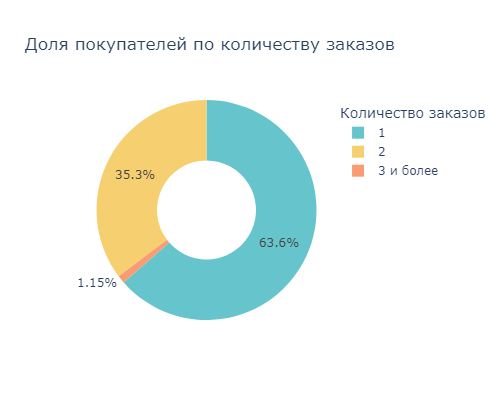

In [61]:
fig = px.pie(df.groupby('loyalty_category', as_index=False).agg({'customer_id': 'count'}),
       values='customer_id', names='loyalty_category',
      title='Доля покупателей по количеству заказов',
            labels={'loyalty_category':'Всего заказов',
                   'customer_id': 'Кол-во клиентов'},
             width=500, height=400, hole=.45,
            color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(legend_title='Количество заказов')
fig.show('png')

В интернет-магазине чаще всего совершают единичные покупки - более 60% всех покупателей. Примерно 35% клиентов совершают 2 заказа и лишь немногим более 1% всех покупателей совершают 3 и более покупок. 

Посмотрим есть ли у магазина супер-лояльные клиенты, которые менее, чем за 1,5 года совершили более 5 покупок.

In [62]:
df.query('orders>5')

,customer_id,revenue,orders,first_order,last_order,avg_rev_per_customer,loyalty_category
732,4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278,35,2018-10-01,2018-10-24,1636.514286,3 и более
1088,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361,17,2019-10-02,2019-10-31,1256.529412,3 и более
1731,b7b865ab-0735-407f-8d0c-31f74d2806cc,3779,7,2019-02-15,2019-04-23,539.857143,3 и более
1897,c971fb21-d54c-4134-938f-16b62ee86d3b,159508,126,2018-10-01,2019-03-06,1265.936508,3 и более


Один из клиентов совершил аж 126 заказа. Для таких лояльных покупателей стоит сделать какие-либо преференции или скидочные предложения.

Имея информацию по частоте заказов и повторным покупкам вернемся еще раз к изучению средней выручки с покупателя в этот раз с учетом "времени жизни" клиента - т.е. с учетом количества дней между первым и последним его заказом в интернет-магазине.

In [63]:
df['lifetime_days'] = df['last_order'] - df['first_order'] + dt.timedelta(days=1)
df['lifetime_days'] = df['lifetime_days'].dt.days

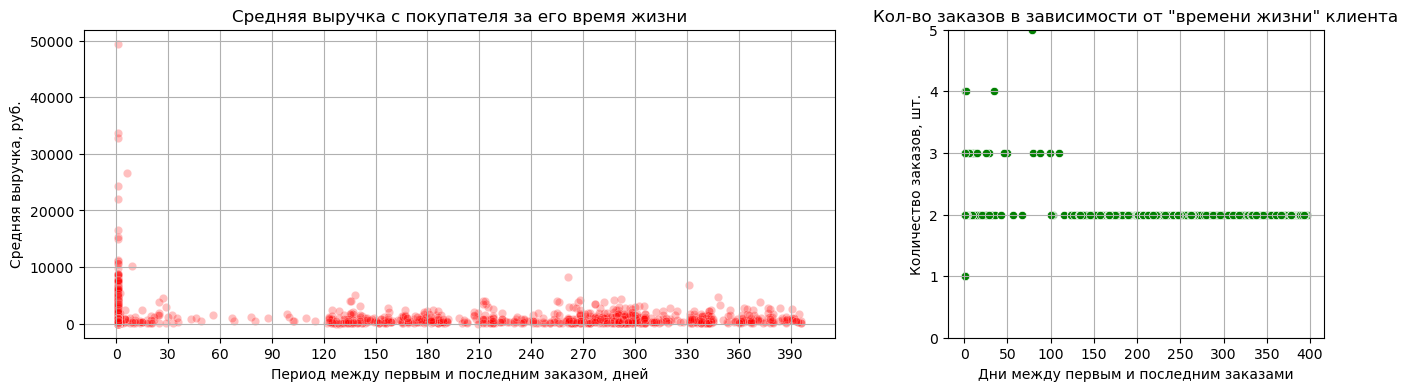

In [64]:
fig, ax = plt.subplots(1,2, figsize=(16, 4), gridspec_kw={'width_ratios': [2, 1]});

sns.scatterplot(ax=ax[0], data=df, x='lifetime_days', y='avg_rev_per_customer', alpha=0.25, color='red')
ax[0].grid()
ax[0].set_xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390])
ax[0].set_title('Средняя выручка с покупателя за его время жизни')
ax[0].set_xlabel('Период между первым и последним заказом, дней')
ax[0].set_ylabel('Средняя выручка, руб.');

sns.scatterplot(data=df, x='lifetime_days', y='orders', color='green')
plt.ylim(0, 5) #чтобы не искажать график ограничим 5 заказами, т.к. только 4 клиента совершило больше заказов 
plt.grid()
plt.xlabel('Дни между первым и последним заказами')
plt.ylabel('Количество заказов, шт.')
plt.title('Кол-во заказов в зависимости от "времени жизни" клиента')
plt.show();

По графикам выше можно сделать следующие выводы:
- подавляющее большинство клиентов совершают 1 или 2 покупки, при этом клиетов, которые совершают повторную покупку спустя 1-4 месяца крайне мало;
- большинство клиентов совершают только 1 покупку (как было раньше обнаружено - более 60% клиентов), т.е. время их жизни всего 1 день;
- при этом также много покупателей, которые оформляют повторный (второй) заказ только спустя 5-7 и даже 10 месяцев.

Таким образом интернет-магазину стоит обратить внимание на удержание клиентов и привличение их к повторной покупке в первые несколько месяцев (от 1 до 3 мес.) после первого заказа. Возможно стоит делать рассылки с предложением новых товаров, которые могли бы заинтересовать на основе товаров из первого заказа, либо проводить акции или делать скидку на вторую покупку.

## Сегментация
При разделении покупателей на сегменты будем использовать **RFM-анализ**, т.е. разделим покупателей на категории по каждому из 3 основных параметров:
1. частота (количество) совершенных заказов (т.е. лояльность) *(ранжирование по данному критерию проведено в разделе 2.7)*;
2. сумма заказа;
3. как давно совершен последний заказ.

### Частота заказов
**Есть ли клиенты, которые делают несколько заказов?**

Данный вопрос исследован в [разделе 2.7](#frequency), клиенты проранжированы на 3 категории в зависимости от кол-ва заказов.

In [65]:
print('Количество клиентов, которые сделали 3 и более заказов =', len(df.query('loyalty_category == "3 и более"')))

Количество клиентов, которые сделали 3 и более заказов = 28


Количество заказов у клиентов с категорией "3 и более" заказов:

In [66]:
df.query('loyalty_category == "3 и более"')['orders'].unique()

array([  5,   3,   4,  35,  17,   7, 126], dtype=int64)

**Какие покупатели чаще всего совершают покупки?**

Посмотрим как распределена средняя сумма со всех заказов каждого из 28 наиболее активных клиента.

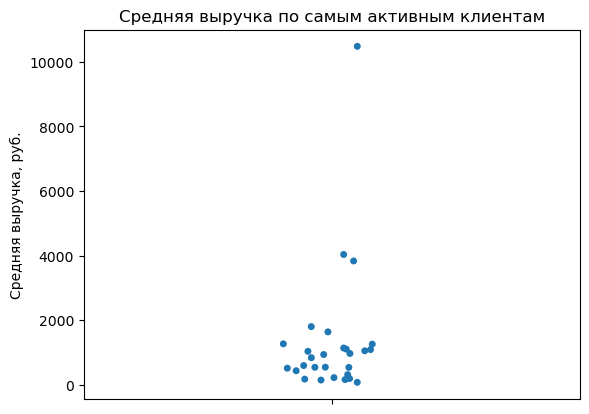

In [67]:
sns.stripplot(data=df.query('orders >= 3'), y='avg_rev_per_customer')
plt.title('Средняя выручка по самым активным клиентам')
plt.ylabel('Средняя выручка, руб.')
plt.show();

Большинство активных покупателей оформляют заказы в среднем на сумму до 2000 руб. Но также есть очень дорогие заказы - более 10 тыс руб.

In [68]:
print('Самые активные клиенты (3 и более покупок) покупают товары следующих категорий:')
print()
for customer in df.query('orders >= 3')['customer_id']:
    print(df_addon.query('customer_id == @customer')['category'].unique())

Самые активные клиенты (3 и более покупок) покупают товары следующих категорий:

['растения']
['растения' 'прочее']
['растения']
['декор']
['растения' 'все для уборки' 'прочее']
['кухня' 'текстиль' 'ванная']
['хранение' 'все для уборки' 'кухня' 'растения' 'ванная' 'текстиль'
 'ремонт' 'декор' 'прочее']
['кухня']
['декор']
['растения']
['хранение' 'прочее']
['растения' 'прочее']
['декор']
['кухня' 'растения' 'прочее' 'ремонт' 'хранение' 'ванная' 'все для уборки']
['кухня' 'растения']
['растения']
['хранение']
['растения']
['растения']
['хранение' 'ванная' 'кухня' 'ремонт' 'растения' 'декор' 'прочее'
 'все для уборки' 'текстиль']
['хранение']
['растения']
['растения']
['все для уборки' 'прочее']
['прочее']
['растения']
['ремонт']
['хранение' 'все для уборки' 'кухня']


Клиенты, совершившие 3 и более заказа чаще всего покупали товары из категории растения. Посмотрим есть ли закономерности в датах покупок товаров у активных клиентов для категории растения (т.к. эта категория более подвержена сезонности, чем другие).

In [69]:
for customer in df.query('orders >= 3')['customer_id']:
        print(df_addon.query('customer_id == @customer & category == "растения"')['month'].unique())

[3 4 5]
[10]
[ 8 10]
[]
[5]
[]
[10]
[]
[]
[2]
[]
[5 6 8]
[]
[10]
[4]
[3 4]
[]
[2 4]
[5 6]
[10 11 12  2  3]
[]
[3 4 6]
[5]
[]
[]
[1 2 4]
[]
[]


Активные покупатели чаще всего покупают растения в апреле.

Таким образом чаще всего совершают заказы клиенты, которые покупают растения (в апреле) или товары для хранения и средняя сумма заказа составляет до 2000 тыс.

Покупатели проранжированы в зависимости от частоты покупок на 3 категории в колонке `loyalty_category`.

### Сумма заказа
**Как распределены заказы по сумме?**

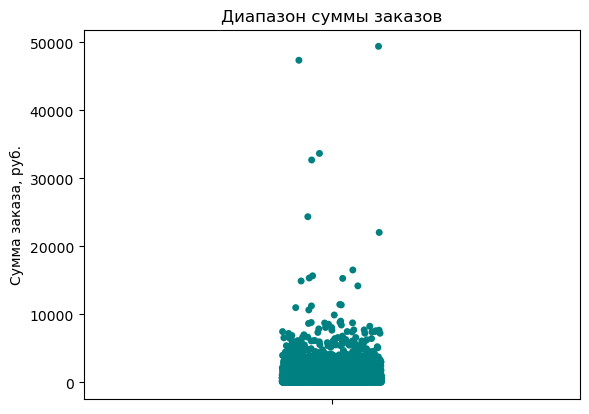

In [70]:
sns.stripplot(data= df_orders, y='order_price', color='teal')
plt.title('Диапазон суммы заказов')
plt.ylabel('Сумма заказа, руб.')
plt.show();

Есть несколько заказов на очень большие суммы. Посмотрим как распределны заказы по сумме, отбросив очень дорогие заказы для большей наглядности.

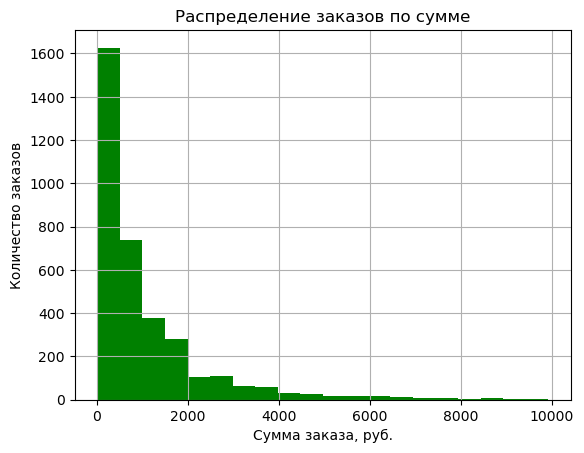

In [71]:
df_orders.query('order_price < 10000')['order_price'].hist(bins=20, color='green')
plt.title('Распределение заказов по сумме')
plt.xlabel('Сумма заказа, руб.')
plt.ylabel('Количество заказов')
plt.show();

В основном сумма заказа не превышает 2000 руб. Наибольшее количество покупок совершают на сумму до 500 руб., почти в 2 раза меньше заказов - на сумму от 500 до 1000 руб. Чуть менее 400 заказов почти за 1,5 года было совершено на сумму от 1000 до 1500 руб. и около 300 заказов на сумму от 1500 до 2000 руб.

**Кто чаще всего делает крупные заказы?** (дополнительно рассмотреть состав заказа и категории товаров)


Выберем топ-10 заказов по сумме заказа.

In [72]:
(df_addon.groupby('order_id').agg({'total_price': 'sum',
                                 'quantity': 'sum',
                                 'date': 'first'})
 .query('total_price > 3000')
 .sort_values(by='total_price', ascending=False)
 .head(10)
)

,total_price,quantity,date
order_id,,,
71668,49432,334,2019-06-11
69830,47385,27,2019-01-15
69156,33680,101,2018-11-29
69504,32718,57,2018-12-21
68878,24370,5,2018-11-06
68760,22056,47,2018-10-26
70080,16536,3,2019-02-04
71206,15680,10,2019-04-19
107812,15358,2,2019-12-31


Крупные по сумме заказы не всегда содержат большое количество товаров, т.е. это могут быть и единичные, но очень дорогие товары.
Самые крупные заказы были совершены в июне и январе 2019 года, что объясняет наибольшие показатели по выручке и среднему чеку за 2019 год. 

Следующие 4 по сумме заказа были совершены в окт-дек 2018 года - как раз в те месяцы вырчука и средний чек интернет-магазина были наибольшими.

То есть выручка магазина падает из-за того, что покупатели перестали совершать крупные покупки. Посмотрим подробнее на товары и категории в крупных заказах.

In [73]:
top_orders = (df_addon.groupby('order_id', as_index=False).agg({'customer_id': 'first',
                                'total_price': 'sum',
                                 'quantity': 'sum',
                                 'date': 'first'})
 .query('total_price > 3000')
 .sort_values(by='total_price', ascending=False)
 .head(10).reset_index(drop=True)
)

top_orders_customer = top_orders['customer_id']

Ниже представлены id клиентов, которые совершили самые крупные по сумме заказы с указанием сколько всего было заказов у этих клиентов и когда был совершен последний заказ.

In [74]:
(df_addon.query('customer_id in @top_orders_customer')
 .groupby('customer_id')
 .agg(orders=('order_id', 'nunique'), last_order=('date', 'last'))
)

,orders,last_order
customer_id,,
146cd9bf-a95c-4afb-915b-5f6684b17444,1,2019-06-11
1b2764ad-9151-4051-a46a-9b01b62e6335,1,2018-11-06
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,2019-04-19
58a4c3cc-504f-43ea-a74a-bae19e665552,2,2019-01-15
5d189e88-d4d6-4eac-ab43-fa65a3c4d106,1,2019-05-20
6987e6d6-a63a-4ce2-a2d0-f424092d235e,1,2018-12-21
8fba3604-ef57-4b9f-b2fe-3402fa8825c8,1,2018-11-29
909564b8-3a5c-4d3e-8310-5ba1c837bbd7,1,2019-02-04
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,1,2018-10-26


7 из 10 клиентов, которые совершали самые дорогие покупки - это клиенты совершившие единичный заказ более чем полгода назад.

In [75]:
print('Категории и товары топ-10 крупных заказов:')
for order in top_orders['order_id']:
    print('--------------------------------------------------------------------------')
    print(df_addon.query('order_id == @order')['category'].unique())
    print(df_addon.query('order_id == @order')[['product', 'quantity', 'price']])

Категории и товары топ-10 крупных заказов:
--------------------------------------------------------------------------
['хранение']
                                               product  quantity  price
5071  вешалки мягкие для деликатных вещей 3 шт шоколад       334  148.0
--------------------------------------------------------------------------
['текстиль']
                                                product  quantity   price
1518  простынь вафельная 200х180 см wellness rw180-0...        27  1755.0
--------------------------------------------------------------------------
['кухня']
                                                product  quantity  price
1027     рыбочистка с деревянной ручкой с ножом 1518024         2   67.0
1026  нож кухонный универсальный с пластмассовой руч...        24  119.0
1024  нож кухонный для мяса с пластмассовой ручкой 3...         6  127.0
1023      набор ножей attribute chef 5 предметов akf522        64  457.0
1022  кухонные ножницы webber из нержав

Чаще всего в крупных по сумме заказах встречаются товары категорий хранение, все для уборки и текстиль. Как помним в категории хранение представлены товары с самыми большими ценами.

Проранжируем клиентов на категории в зависимости от средней суммы заказа (т.к. один и тот же клиент может совершать покупки на разные суммы):
- до 500 руб.
- от 500 до 3000 руб.
- более 3000 руб.

In [76]:
print('Всего заказов на сумму более 3 тыс руб.:', len(df_orders.query('order_price > 3000')))

Всего заказов на сумму более 3 тыс руб.: 264


In [77]:
def price(row):
    '''Ранжируем клиентов в зависимости от суммы заказа'''
    
    if row['avg_rev_per_customer'] <= 500:
        return 'низкая'
    if row['avg_rev_per_customer'] <= 3000:
        return 'средняя'
    else:
        return 'высокая'

In [78]:
df['avg_rev_category'] = df.apply(price, axis=1)

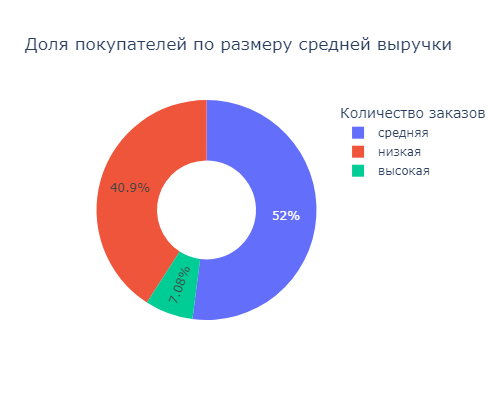

In [79]:
fig = px.pie(df.groupby('avg_rev_category', as_index=False).agg({'customer_id': 'count'}),
       values='customer_id', names='avg_rev_category',
      title='Доля покупателей по размеру средней выручки',
            labels={'avg_rev_category':'Категория по средней выручке',
                   'customer_id': 'Кол-во клиентов'},
             width=500, height=400, hole=.45)
fig.update_layout(legend_title='Количество заказов')
fig.show('png')

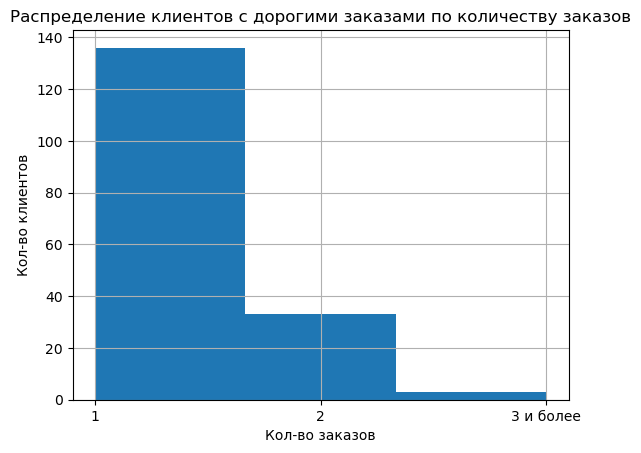

In [80]:
df.query('avg_rev_category == "высокая"')['loyalty_category'].sort_values().hist(bins=3)
plt.title('Распределение клиентов с дорогими заказами по количеству заказов')
plt.xlabel('Кол-во заказов')
plt.ylabel('Кол-во клиентов')
plt.show();

График выше подтверждает, что клиенты, оформившие наиболее дорогие заказы совершают единичную покупку в интернет-магазине и больше не возвращаются. Для повышения выручки стоит разработать стратегию по удержанию таких клиентов. 

### Давность последнего заказа
**Как давно был совершен последний заказ клиента?**

Будем считать, что сейчас 1 февраля 2020 года, чтобы данные в датасете были актуальны. Разделим всех покупателей на 3 категории относительно даты оформления последнего заказа:
- менее 1 месяца назад (можно запросить отзыв о заказе и магазине в целом или предложить новые товары, чтобы удержать интерес);
- последний заказ совершен от 1 до 3 месяцев назад (клиенты, которые еще помнят про магазин, их нужно удержать и мотивировать к повторной покупке);
- прочие (уходящие).

In [81]:
today = dt.date(2020, 2, 1)

In [82]:
def recency(row):
    if today - row['last_order'] <= dt.timedelta(days = 30):
        return 'менее 1 мес.'
    if today - row['last_order'] <= dt.timedelta(days = 90):
        return '1-3 мес.'
    else:
        return 'более 3 мес.'

In [83]:
df['recency'] = df.apply(recency, axis=1)

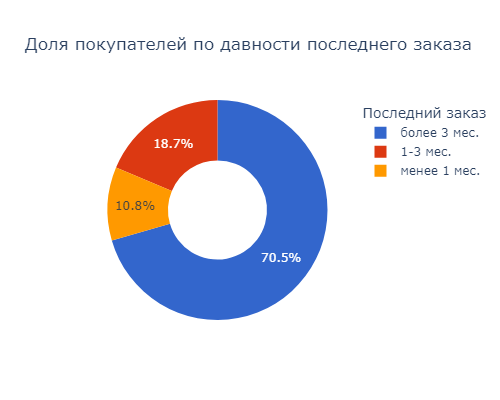

In [84]:
fig = px.pie(df.groupby('recency', as_index=False).agg({'customer_id': 'count'}),
       values='customer_id', names='recency',
      title='Доля покупателей по давности последнего заказа',
            labels={'recency':'Последний заказ',
                  'customer_id': 'Кол-во клиентов'},
             width=500, height=400, hole=.45,
            color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(legend_title='Последний заказ')
fig.show('png')

- 70% клиентов интернет-магазина оформляли последний заказ более 3 месяцев назад - некоторых из них (которые оформили более 1 заказа на среднюю или высокую сумму) можно попытаться вернуть напомнив рассылкой с предложениями/акциями и/или запросить обратную связь о магазине;
- Чуть меньше 20% клиентов совершали заказ не так давно, нужно стремиться их удержать, рекомендовать похожие товары и рассылать предложения, чтобы они вернулись и пр.;
- Почти 11% покупателей сделали покупку не так давно. Для новичков можно отправить приветственную рассылку и удержать их интерес.

### Сезонность
**Влияет ли сезонность на совершение покупок?** есть ли связь между сезонностью и категориями покупаемых товаров? какие покупатели чаще делают сезонные покупки?

Чтобы ответить на поставленный вопрос построим график изменения количества заказов по месяцам в разбивке по категориям.

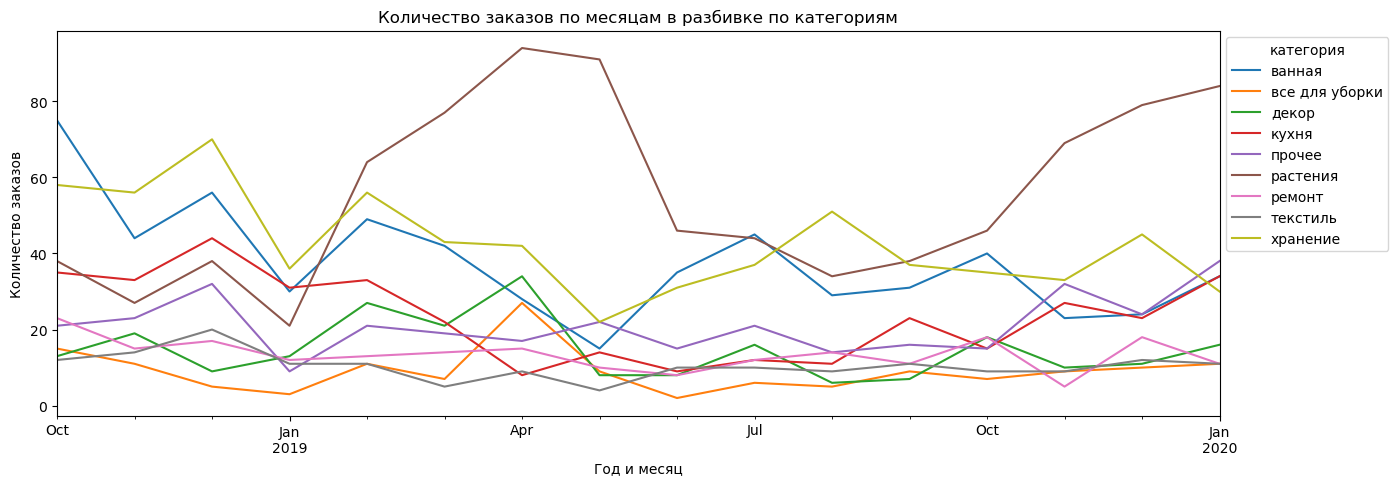

In [85]:
df_addon.pivot_table(index='year_month', columns='category', values='order_id', aggfunc='nunique').plot(figsize=(15,5))
plt.legend(title='категория', bbox_to_anchor=(1,1), loc='upper left')
plt.title('Количество заказов по месяцам в разбивке по категориям')
plt.xlabel('Год и месяц')
plt.ylabel('Количество заказов')
plt.show();

По графику можно сделать следующие выводы относительно сезонности покупок:
- количество заказов почти для каждой из категорий достигает **минимума в мае** - это можно связать с майскими праздниками и тем, что большинство людей посвящают больше времени отдыху или путешествиям, соответственно покупки откладываются на потом;
- заказы товаров категории растения растут начиная с февраля, имеют выраженный пик в апреле и снижаются в июне. Весной обычно начинается подготовка к дачному сезону.

Посмотрим на аналогичный график по количеству покупаемых товаров из каждой категории по месяцам.

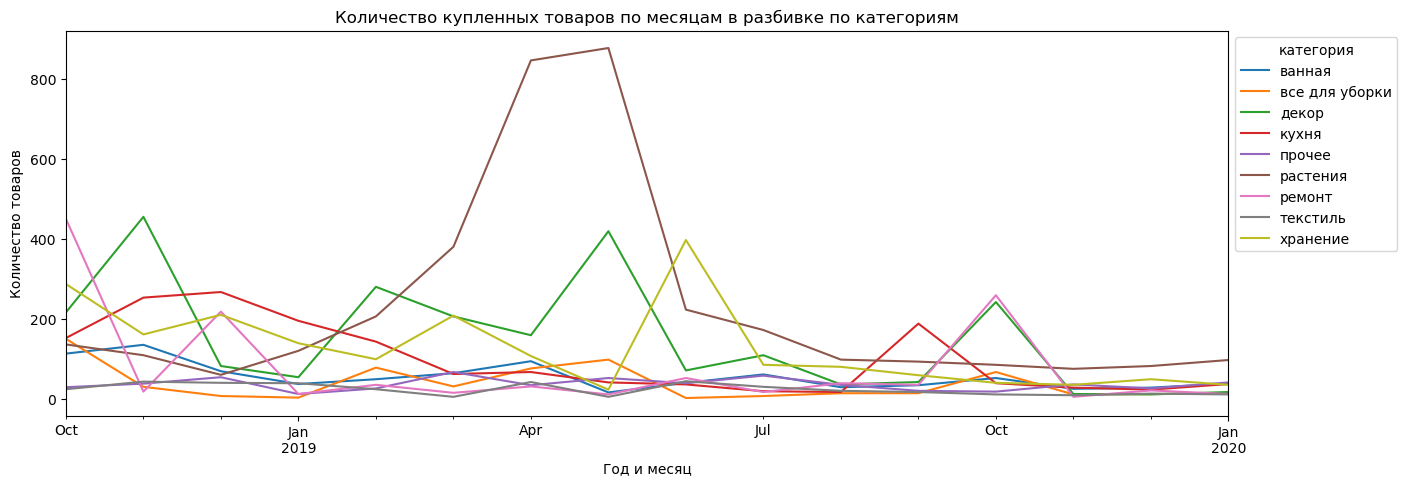

In [86]:
df_addon.pivot_table(index='year_month', columns='category', values='quantity', aggfunc='sum').plot(figsize=(15,5))
plt.legend(title='категория', bbox_to_anchor=(1,1), loc='upper left')
plt.title('Количество купленных товаров по месяцам в разбивке по категориям')
plt.xlabel('Год и месяц')
plt.ylabel('Количество товаров')
plt.show();

На этом графике еще отчетливее виден пик по покупке растений. Небольшие всплески по прочим категориям сложно связать с сезонными факторами.

Определим клиентов, которые совершали сезонные покупки - т.е. покупали весной товары из категории растения. Таких клиентов можно "отметить", чтобы перед началом следующего сезона прислать подходящие предложения на основе предыдущей сезонной покупки, а также  рекомендуемые товары. По желанию заказчика можно отобрать только тех клиентов, кто совершил покупку на сумму свыши Х руб., чтобы привлекать к повторным сезонным покупкам более платящих клиентов.

In [87]:
spring = [3, 4, 5]
seasonal_customers = (df_addon.query('month in @spring and category == "растения"')
 .groupby('customer_id', as_index=False).agg({'order_id': 'nunique',
                              'quantity': 'sum',
                              'total_price': 'sum'})
 .sort_values(by='total_price', ascending=False))

In [88]:
print('Всего сезонных покупателей:', len(seasonal_customers))

Всего сезонных покупателей: 229


Добавим к "сезонным" клиентам метку:
- True, если весной была совершена покупка товаров из категории растения;
- False, если растения весной не покупались.

In [89]:
df['seasonal'] = np.where(df['customer_id'].isin(seasonal_customers['customer_id']), 
                           True, 
                           False)

Посмотрим каких покупателей среди сезонных больше всего.

In [90]:
df.query('seasonal == True').groupby(['loyalty_category', 'avg_rev_category', 'recency']).agg({'customer_id': 'nunique'})

customer_id
loyalty_category avg_rev_category recency                  
1                высокая          более 3 мес.            9
                 низкая           более 3 мес.           53
                 средняя          более 3 мес.          101
2                низкая           1-3 мес.               19
                                  более 3 мес.            9
                                  менее 1 мес.            5
                 средняя          1-3 мес.               11
                                  более 3 мес.            9
                                  менее 1 мес.            2
3 и более        низкая           более 3 мес.            3
                 средняя          более 3 мес.            8

Чаще всего сезонные покупки совершали клиенты оформившие только 1 заказ на среднюю сумму (от 500 до 3000 руб) более 3 месяцев назад. Это объясняется тем, что в для анализа пока доступна весна только за 1 год.

### Структура потребления
**Какая структура потребления?**

Посмотрим на топ-5 популярных товаров в каждой из категорий (популярными считаем те, которые чаще всего заказывали не зависимо от количества самого товара внутри заказа). Смотрим именно на количество заказов, а не количество проданного товара, т.к. встречаются единичные заказы с 300 шт. одного товара - это искажает статистику потребления.

In [91]:
for cat in df_addon['category'].unique():
    display(df_addon.query('category == @cat')
                                .groupby(['category', 'product'])
                        .agg(orders=('order_id', 'nunique'),
                             sold_quantity=('quantity', 'sum'), 
                             total_revenue=('total_price', 'sum'))
                        .sort_values(by='orders', ascending=False).head()
                         )

orders  \
category product                                                      
растения пеларгония розебудная red pandora укорененный ч...      66   
         пеларгония розебудная prins nikolai укорененный...      56   
         пеларгония зональная диам. 12 см сиреневый полу...      53   
         пеларгония розебудная mary укорененный черенок          40   
         пеларгония розебудная margaretha укорененный че...      31   

                                                             sold_quantity  \
category product                                                             
растения пеларгония розебудная red pandora укорененный ч...             82   
         пеларгония розебудная prins nikolai укорененный...             63   
         пеларгония зональная диам. 12 см сиреневый полу...             64   
         пеларгония розебудная mary укорененный черенок                 48   
         пеларгония розебудная margaretha укорененный че...             47   

                                                             total_revenue  
category product                                                            
растения пеларгония розебудная red pandora укорененный ч...          11062  
         пеларгония розебудная prins nikolai укорененный...           8492  
         пеларгония зональная диам. 12 см сиреневый полу...          10949  
         пеларгония розебудная mary укорененный черенок               6470  
         пеларгония розебудная margaretha укорененный че...           6356

orders  sold_quantity  \
category product                                                              
прочее   подрукавник складной ника п                       6              6   
         котовник блю мун синий объем 1 л                  5              6   
         настурция орхидное пламя 5 шт 4650091480692       5              5   
         мединилла магнифика d17 см h60 см                 4              4   
         укроп обильнолистный 3,0 г 4660010772562          4              4   

                                                      total_revenue  
category product                                                     
прочее   подрукавник складной ника п                           1344  
         котовник блю мун синий объем 1 л                       582  
         настурция орхидное пламя 5 шт 4650091480692             70  
         мединилла магнифика d17 см h60 см                     4136  
         укроп обильнолистный 3,0 г 4660010772562                40

orders  \
category product                                                      
ванная   сушилка для белья настенная zalger prima 510-72...      17   
         сушилка для белья потолочная лиана 2,0 м 1703009        11   
         сушилка для белья потолочная лиана 2,4 м 1703011        10   
         таз пластмассовый со стиральной доской (иж), 14...      10   
         сушилка для белья напольная ника сбп1/с 18 м             9   

                                                             sold_quantity  \
category product                                                             
ванная   сушилка для белья настенная zalger prima 510-72...             20   
         сушилка для белья потолочная лиана 2,0 м 1703009               11   
         сушилка для белья потолочная лиана 2,4 м 1703011               11   
         таз пластмассовый со стиральной доской (иж), 14...             10   
         сушилка для белья напольная ника сбп1/с 18 м                   10   

                                                             total_revenue  
category product                                                            
ванная   сушилка для белья настенная zalger prima 510-72...           5533  
         сушилка для белья потолочная лиана 2,0 м 1703009             6589  
         сушилка для белья потолочная лиана 2,4 м 1703011             8074  
         таз пластмассовый со стиральной доской (иж), 14...           3394  
         сушилка для белья напольная ника сбп1/с 18 м                 5990

orders  \
category product                                                      
хранение сумка-тележка 2-х колесная gimi argo синяя              47   
         тележка багажная delta тбр-20 синий грузоподъем...      17   
         тележка багажная delta тбр-20 коричневый с оран...      16   
         сумка-тележка 2-х колесная складная gimi flexi ...      11   
         тележка багажная delta тбр-15 цвет в ассортимен...      10   

                                                             sold_quantity  \
category product                                                             
хранение сумка-тележка 2-х колесная gimi argo синяя                     47   
         тележка багажная delta тбр-20 синий грузоподъем...             17   
         тележка багажная delta тбр-20 коричневый с оран...             17   
         сумка-тележка 2-х колесная складная gimi flexi ...             12   
         тележка багажная delta тбр-15 цвет в ассортимен...             10   

                                                             total_revenue  
category product                                                            
хранение сумка-тележка 2-х колесная gimi argo синяя                  50405  
         тележка багажная delta тбр-20 синий грузоподъем...          12453  
         тележка багажная delta тбр-20 коричневый с оран...          11749  
         сумка-тележка 2-х колесная складная gimi flexi ...          19788  
         тележка багажная delta тбр-15 цвет в ассортимен...           6446

orders  \
category product                                                      
кухня    овощеварка алюминиевая scovo мт-045, хозлэнд, 1...       5   
         кувшин пластмассовый с крышкой "кумган" 2,0 л 1...       5   
         скатерть dasch донна роза из пвх 0401-2 розы кр...       5   
         термокружка яромир кремль яр-2406м 400 мл                5   
         салатник luminarc эмпилабль велада 17 см l7997           5   

                                                             sold_quantity  \
category product                                                             
кухня    овощеварка алюминиевая scovo мт-045, хозлэнд, 1...              5   
         кувшин пластмассовый с крышкой "кумган" 2,0 л 1...              5   
         скатерть dasch донна роза из пвх 0401-2 розы кр...              6   
         термокружка яромир кремль яр-2406м 400 мл                       5   
         салатник luminarc эмпилабль велада 17 см l7997                  5   

                                                             total_revenue  
category product                                                            
кухня    овощеварка алюминиевая scovo мт-045, хозлэнд, 1...           2245  
         кувшин пластмассовый с крышкой "кумган" 2,0 л 1...            745  
         скатерть dasch донна роза из пвх 0401-2 розы кр...           2652  
         термокружка яромир кремль яр-2406м 400 мл                    1602  
         салатник luminarc эмпилабль велада 17 см l7997                820

orders  \
category       product                                                      
все для уборки ерш унитазный с деревянной ручкой , ваир 1712012         8   
               тряпкодержатель с металлическим креплением (г) ...       4   
               щетка-сметка 4-х рядная деревянная 300 мм (фигу...       4   
               окномойка с алюминиевой телескопической ручкой ...       4   
               окномойка с пластмассовой ручкой 42 см щетка 21...       4   

                                                                   sold_quantity  \
category       product                                                             
все для уборки ерш унитазный с деревянной ручкой , ваир 1712012              103   
               тряпкодержатель с металлическим креплением (г) ...              5   
               щетка-сметка 4-х рядная деревянная 300 мм (фигу...            105   
               окномойка с алюминиевой телескопической ручкой ...              5   
               окномойка с пластмассовой ручкой 42 см щетка 21...              4   

                                                                   total_revenue  
category       product                                                            
все для уборки ерш унитазный с деревянной ручкой , ваир 1712012             5633  
               тряпкодержатель с металлическим креплением (г) ...            595  
               щетка-сметка 4-х рядная деревянная 300 мм (фигу...           6810  
               окномойка с алюминиевой телескопической ручкой ...           2320  
               окномойка с пластмассовой ручкой 42 см щетка 21...            868

orders  \
category product                                                      
декор    муляж баклажан 18 см                                    10   
         искусственная композиция из цветов пластиковая ...       9   
         муляж зеленое яблоко полиуретан d6 см                    8   
         муляж персики мини полиуретан d6 см                      8   
         муляж яблоко, оранжевый, 8,5 см, полиуретан              8   

                                                             sold_quantity  \
category product                                                             
декор    муляж баклажан 18 см                                           23   
         искусственная композиция из цветов пластиковая ...             21   
         муляж зеленое яблоко полиуретан d6 см                          16   
         муляж персики мини полиуретан d6 см                            28   
         муляж яблоко, оранжевый, 8,5 см, полиуретан                    54   

                                                             total_revenue  
category product                                                            
декор    муляж баклажан 18 см                                         1357  
         искусственная композиция из цветов пластиковая ...           1179  
         муляж зеленое яблоко полиуретан d6 см                         352  
         муляж персики мини полиуретан d6 см                           586  
         муляж яблоко, оранжевый, 8,5 см, полиуретан                  2948

orders  \
category product                                                      
текстиль коврик придверный хлопковый 60х140 см мультикол...       5   
         коврик придверный attribute nature кокосовый 60...       5   
         коврик хлопковый 40х60 см цвета в ассортименте ...       5   
         коврик резиновый ажурный iron grill 45х75 см 6207        4   
         коврик влаговпитывающий ребристый 60х90 см стан...       4   

                                                             sold_quantity  \
category product                                                             
текстиль коврик придверный хлопковый 60х140 см мультикол...             11   
         коврик придверный attribute nature кокосовый 60...             55   
         коврик хлопковый 40х60 см цвета в ассортименте ...             12   
         коврик резиновый ажурный iron grill 45х75 см 6207               4   
         коврик влаговпитывающий ребристый 60х90 см стан...              5   

                                                             total_revenue  
category product                                                            
текстиль коврик придверный хлопковый 60х140 см мультикол...           3047  
         коврик придверный attribute nature кокосовый 60...          17227  
         коврик хлопковый 40х60 см цвета в ассортименте ...           1164  
         коврик резиновый ажурный iron grill 45х75 см 6207            1736  
         коврик влаговпитывающий ребристый 60х90 см стан...           2080

orders  \
category product                                                      
ремонт   стяжка оконная с болтом ст-55 цинк, 1108354              6   
         штора для ванной комнаты quadretto 240х200 см б...       5   
         полки qwerty нью-йорк правый белый/голубой 44х2...       4   
         карниз для ванной комнаты виолет раздвижной 280...       4   
         штора для ванной комнаты cannetto 240х200 см ко...       4   

                                                             sold_quantity  \
category product                                                             
ремонт   стяжка оконная с болтом ст-55 цинк, 1108354                   101   
         штора для ванной комнаты quadretto 240х200 см б...              5   
         полки qwerty нью-йорк правый белый/голубой 44х2...              4   
         карниз для ванной комнаты виолет раздвижной 280...              5   
         штора для ванной комнаты cannetto 240х200 см ко...              4   

                                                             total_revenue  
category product                                                            
ремонт   стяжка оконная с болтом ст-55 цинк, 1108354                  1964  
         штора для ванной комнаты quadretto 240х200 см б...           5995  
         полки qwerty нью-йорк правый белый/голубой 44х2...           7760  
         карниз для ванной комнаты виолет раздвижной 280...           1120  
         штора для ванной комнаты cannetto 240х200 см ко...           4796

Можно отметить большой спрос среди клиентов интернет-магазина на пеларгонии (она же герань), сумки-тележки и сушилки. Как видно в категории прочее оказались растения, это допустимые погрешности при распределении, т.к. учесть все названия растений трудно.

Итак, клиенты разделены на 3 категории по каждому из 3 параметров в соответствии с RFM-анализом: частота заказов, давность последней покупки и размер средней выручки с клиента. Рекмоендации будут сформулированы в разделе выводы.

## Проверка продуктовых гипотез
Проверим корректность разделения покупателей интернет-магазина на сегменты, полученную в предыдущем разделе, а именно проверим две гипотезы:
1. H0: выделенные сегменты  не имеют статистически значимые различия между собой по средней выручке с покупателя;
2. H0: сезонные и несезонные клиенты не имеют статистически значимые различия между собой по средней выручке с покупателя.

### Различия по средней выручке с покупателя в зависимости от давности последнего заказа

- H0: выделенные сегменты по давности последнего заказа НЕ имеют статистически значимые различия между собой по средней выручке с покупателя
- H1: выделенные сегменты по давности последнего заказа имеют статистически значимые различия между собой по средней выручке с покупателя

Для начала посмотрим сколько покупателей попали в каждую из групп по давности заказа.

In [92]:
df.groupby('recency').agg(total_customers=('customer_id', 'nunique'))

,total_customers
recency,
1-3 мес.,454
более 3 мес.,1713
менее 1 мес.,262


Выделим сравниваемые сегменты в соответствующие датасеты.

In [93]:
new = df.query('recency == "менее 1 мес."')['avg_rev_per_customer']
medium = df.query('recency == "1-3 мес."')['avg_rev_per_customer']
old = df.query('recency == "более 3 мес."')['avg_rev_per_customer']

Для начала проверим получившиеся выборки на нормальность.

In [94]:
alpha = 0.05  # критический уровень статистической значимости

for sample in [new, medium, old]:
    results = st.shapiro(sample)
    p_value = results[1]

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  8.551234974281049e-19
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  6.436647693797461e-26
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Ни одна выборка не распределена нормально. Для проверки стат. гипотезы необходимо использовать тест Манна-Уитни.

In [95]:
alpha = 0.05  # критический уровень статистической значимости
print('Сравнение сегментов с последним заказом менее 1 мес. назад и 1-3 мес. назад')
results = st.mannwhitneyu(new, medium)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

Сравнение сегментов с последним заказом менее 1 мес. назад и 1-3 мес. назад
p-значение:  0.15070952212537198
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [96]:
results = st.mannwhitneyu(new, old)
print('Сравнение сегментов с последним заказом менее 1 мес. назад и более 3 мес. назад')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

Сравнение сегментов с последним заказом менее 1 мес. назад и более 3 мес. назад
p-значение:  0.0002910601505866826
Отвергаем нулевую гипотезу: разница статистически значима


In [97]:
results = st.mannwhitneyu(medium, old)
print('Сравнение сегментов с последним заказом 1-3 мес. назад и более 3 мес. назад')
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

Сравнение сегментов с последним заказом 1-3 мес. назад и более 3 мес. назад
p-значение:  0.008084045940382475
Отвергаем нулевую гипотезу: разница статистически значима


Клиенты, которые оформили заказ менее 1 мес. назад или 1-3 мес. назад не имеют между собой статистически значимых различий в средней выручке, но имеют стат. значимые различия с теми, кто оформлял свой последний заказ более 3 мес. назад. Это значит, что раньше покупатели интернет-магазина оформляли более дорогие заказы, а за последние 3 месяца крупных заказов не было (что подтверждается на графике с выручкой и средним чеком).

### Различия в количестве заказов в зависимости от давности последнего заказа
- H0: выделенные сегменты по давности последнего заказа НЕ имеют статистически значимые различия между собой по количеству оформленных заказов
- H1: выделенные сегменты по давности последнего заказа имеют статистически значимые различия между собой по количеству оформленных заказов

In [98]:
new = df.query('recency == "менее 1 мес."')['orders']
medium = df.query('recency == "1-3 мес."')['orders']
old = df.query('recency == "более 3 мес."')['orders']

In [99]:
alpha = 0.05  # критический уровень статистической значимости

for sample in [new, medium, old]:
    results = st.shapiro(sample)
    p_value = results[1]

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  3.874135874064539e-33
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  5.654239303550637e-42
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [100]:
alpha = 0.05  # критический уровень статистической значимости
print('Сравнение сегментов с последним заказом менее 1 мес. назад и 1-3 мес. назад')
results = st.mannwhitneyu(new, medium)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

Сравнение сегментов с последним заказом менее 1 мес. назад и 1-3 мес. назад
p-значение:  0.3762144032856245
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [101]:
alpha = 0.05  # критический уровень статистической значимости
print('Сравнение сегментов с последним заказом менее 1 мес. назад и 1-3 мес. назад')
results = st.mannwhitneyu(new, old)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

Сравнение сегментов с последним заказом менее 1 мес. назад и 1-3 мес. назад
p-значение:  9.244238636660008e-214
Отвергаем нулевую гипотезу: разница статистически значима


In [102]:
alpha = 0.05  # критический уровень статистической значимости
print('Сравнение сегментов с последним заказом менее 1 мес. назад и 1-3 мес. назад')
results = st.mannwhitneyu(old, medium)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

Сравнение сегментов с последним заказом менее 1 мес. назад и 1-3 мес. назад
p-значение:  2.599369205113626e-286
Отвергаем нулевую гипотезу: разница статистически значима


Клиенты, совершившие последний заказ более 3 месяцев назад не только делали больше крупных заказов, но и в целом совершали заказы чаще, чем не могут похвастаться клиенты, совершившие свой последний заказ за последние 3 месяца. Это как раз причина уменьшения вырчуки, нужно удерживать новых клиентов и мотивировать их к новым покупкам на крупные суммы.

### Различия по сезонности
- H0: сезонные и несезонные клиенты НЕ имеют статистически значимые различия между собой по средней выручке с покупателя
- H1: сезонные и несезонные клиенты имеют статистически значимые различия между собой по средней выручке с покупателя

Аналогично сначала посмотрим как распределились пользователи на сезонных и несезонных.

In [103]:
df.groupby('seasonal').agg(total_customers=('customer_id', 'nunique'))

,total_customers
seasonal,
False,2200
True,229


Выделим выборки для дальнейшего сравнения.

In [104]:
seasonal = df.query('seasonal == True')['avg_rev_per_customer']
not_seasonal = df.query('seasonal == False')['avg_rev_per_customer']

Проверим их на нормальность.

In [105]:
alpha = 0.05  # критический уровень статистической значимости

for sample in [seasonal, not_seasonal]:
    results = st.shapiro(sample)
    p_value = results[1]

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

p-значение:  4.801994128432585e-20
Отвергаем нулевую гипотезу: распределение не нормально
p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Распределения не нормальны, значит для проверки стат. гипотезы используем тест Манна-Уитни.

In [106]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(seasonal, not_seasonal)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

p-значение:  0.9744887886268996
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Средняя выручка от сезонных покупателей НЕ имеет статистически значимых различий со средней выручкой от несезонных покупателей.

## Выводы

Была проведена сегментация клиентов интернет-магазина на основе их истории покупок. По каждому из трех факторов (размер средней выручки с клиента, количество заказов и давность последней покупки) все клиенты были разделены на три категории. Дополнительно покупателе разделены на «сезонных» и «несезонных» в зависимости от того, была ли совершена покупка растений весной. Статистические тесты показали наличие стат. значимых различие в средней выручке и кол-ве заказов между клиентами, которые совершали свой последний заказ более 3 месяцев назад и теми, чей последний заказ был в последние 3 месяца. Это как раз причина уменьшения вырчуки, нужно удерживать новых клиентов и мотивировать их к новым покупкам на крупные суммы. При этом статистически значимых различий в средней выручке между «сезонными» и «несезонными» покупателями не обнаружено.

Рекомендации по работе с сегментами пользователей:
Основные усилия по работе и их удержанию покупателей стоит сосредоточить на клиентах, оформивших последний заказ 1-3 месяца назад: нужно узнать почему они перестали заказывать и попытаться вернуть их, отправив им рассылку с интересными акциями, рассылку с опросом, а также стимулировать на повторные покупки скидками.
Те, кто сделал последний заказ меньше месяца назад: новичкам – приветственную рассылку-знакомство, а если заказ был на большую сумму, то сразу интересное предложение/бонус. Если это не первый заказ клиента, то можно попробовать увеличить прибыль допродажей – рекомендовать похожие или сопутствующие товары (но не надоедать).
Клиенты, которые оформляли свой последний заказ более 3 месяцев назад рискуют стать «уходящими» клиентами. Но не стоит пытаться удержать всех. Далем рассылку только тем, кто оформлял более 1 заказа (обратная связь – почему ушли), а тех кто совершал большие покупки и часто – стимулируем бонусами/предлагаем программу лояльности

Кроме того была проведена категоризация товаров. Наибольшую выручку магазину приносят продаже товаров из категорий «хранение» и «ванная», т.к. в этих категориях содержатся наиболее дорогие товары. Стоит рассмотреть возможность расширение ассортимента товаров в этих категорий. Несмотря на то, что чаще всего в магазине покупают товары категории «растения» – цена на такие товары в основном не превышает 2 000 руб.

Ниже представлено распределение клиентов по сегментам в разрезе количества заказов (частоты покупок), средней суммы заказа и давности последнего заказа.

In [107]:
df.groupby(['loyalty_category', 'avg_rev_category', 'recency']).agg(total_customers=('customer_id', 'nunique'))

total_customers
loyalty_category avg_rev_category recency                      
1                высокая          более 3 мес.              135
                                  менее 1 мес.                1
                 низкая           1-3 мес.                    4
                                  более 3 мес.              588
                                  менее 1 мес.                2
                 средняя          1-3 мес.                    1
                                  более 3 мес.              811
                                  менее 1 мес.                2
2                высокая          1-3 мес.                   17
                                  более 3 мес.                8
                                  менее 1 мес.                8
                 низкая           1-3 мес.                  197
                                  более 3 мес.               70
                                  менее 1 мес.              124
                 средняя          1-3 мес.                  235
                                  более 3 мес.               73
                                  менее 1 мес.              125
3 и более        высокая          более 3 мес.                3
                 низкая           более 3 мес.                8
                 средняя          более 3 мес.               17